In [1]:
# Dependencies
import csv
import requests as req
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import seaborn
from citipy import citipy
import time
import random

In [81]:
# Save config information.
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
endpoint = "http://api.openweathermap.org/data/2.5/weather"
units = "Imperial"

# Build partial query URL

In [3]:
#Creates 2 lists of latitudes and longitutdes randomly
#Zips into a single dictionary

lats = []
lngs = []
for x in range(500):
    lats.append(random.randrange(-90,90))
    lngs.append(random.randrange(-180,180))
locs = dict(zip(lats,lngs))
#print(len(lats), len(lngs))
type(locs)

dict

In [82]:
#Uses Citipy to identify the nearest city with country code

locs_conv = []
weatherdata_df = pd.DataFrame(columns = ['City','Temp','Humidity','Clouds','Wind_Speed'])
response_data = []

for key,value in locs.items():
    city = citipy.nearest_city(key,value)
    locs_conv.append(city)

#locs_conv
city_counter = 0
print('Beginning Data Retrieval')
print('-----------------------------')
for location in locs_conv:
    print('Processing record '+str(city_counter)+' of '+ str(len(locs_conv))+"|"+location.city_name)
    city_counter +=1
    
    try:
        params = {
            'appid': api_key,
            'units': units,
            'q': location.city_name+","+location.country_code
        }
                     
        #print('Getting Data for #'+str(city_counter))
        
        response = req.get(endpoint, params=params).json()
        response_data.append(response)
        target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (params['units'],api_key,location.city_name.strip())
        
        
    except:
        continue
    
    print(target_url)
    time.sleep(1)

    
#creates a dataframe to store the responses and then save it to a csv    
response_df = pd.DataFrame(response_data)
response_df.to_csv('saved_data.csv')  



print('Data Retrieval Complete')        


Beginning Data Retrieval
-----------------------------
Processing record 0 of 163|jhikargachha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=jhikargachha
Processing record 1 of 163|torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=torbay
Processing record 2 of 163|carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=carnarvon
Processing record 3 of 163|wala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=wala
Processing record 4 of 163|verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=verkhnevilyuysk
Processing record 5 of 163|aragarcas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=aragarcas
Processing record 6 of 163|porangatu
http:/

Processing record 55 of 163|carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=carnarvon
Processing record 56 of 163|punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta arenas
Processing record 57 of 163|castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=castro
Processing record 58 of 163|manoel urbano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=manoel urbano
Processing record 59 of 163|walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=walvis bay
Processing record 60 of 163|yerofey pavlovich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=yerofey pavlovich
Processing record 61 of 163|avarua
http://api.openweathermap.org/dat

Processing record 110 of 163|elko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=elko
Processing record 111 of 163|bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bluff
Processing record 112 of 163|bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bluff
Processing record 113 of 163|ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia
Processing record 114 of 163|yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=yellowknife
Processing record 115 of 163|bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bilibino
Processing record 116 of 163|denau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6

In [5]:
response_df = response_df.dropna(thresh = 3)
response_df

base       clouds  cod                            coord  \
1    stations  {'all': 90}  200    {'lon': -52.73, 'lat': 47.67}   
2    stations  {'all': 56}  200   {'lon': 113.63, 'lat': -24.87}   
4    stations  {'all': 12}  200    {'lon': 120.32, 'lat': 63.45}   
5    stations  {'all': 92}  200    {'lon': -52.25, 'lat': -15.9}   
6    stations  {'all': 92}  200   {'lon': -49.15, 'lat': -13.44}   
7    stations   {'all': 0}  200    {'lon': 19.23, 'lat': -34.42}   
8    stations  {'all': 40}  200    {'lon': -175.2, 'lat': -21.2}   
9    stations  {'all': 20}  200   {'lon': -155.09, 'lat': 19.73}   
10   stations   {'all': 0}  200     {'lon': 102.5, 'lat': 71.97}   
11   stations  {'all': 20}  200     {'lon': 11.22, 'lat': 42.44}   
12   stations  {'all': 12}  200  {'lon': -134.97, 'lat': -23.12}   
13   stations  {'all': 20}  200      {'lon': 95.32, 'lat': 5.89}   
14   stations  {'all': 75}  200    {'lon': -51.72, 'lat': 64.18}   
16   stations  {'all': 48}  200    {'lon': 128.87, 'lat': 71.69}   
18   stations  {'all': 88}  200     {'lon': 81.77, 'lat': 51.95}   
19   stations  {'all': 75}  200   {'lon': 147.33, 'lat': -42.88}   
20   stations   {'all': 1}  200   {'lon': -159.32, 'lat': 22.08}   
21   stations  {'all': 92}  200    {'lon': 168.33, 'lat': -46.6}   
22   stations  {'all': 75}  200   {'lon': 122.23, 'lat': -17.97}   
23   stations  {'all': 90}  200    {'lon': -89.67, 'lat': 21.28}   
24   stations  {'all': 12}  200      {'lon': 44.93, 'lat': 43.7}   
26   stations  {'all': 64}  200   {'lon': 145.92, 'lat': -41.07}   
27   stations  {'all': 56}  200   {'lon': 113.63, 'lat': -24.87}   
28   stations   {'all': 1}  200   {'lon': -106.31, 'lat': 42.87}   
29   stations  {'all': 40}  200   {'lon': -70.92, 'lat': -53.15}   
30   stations  {'all': 40}  200     {'lon': -68.3, 'lat': -54.8}   
31   stations  {'all': 88}  200     {'lon': 27.85, 'lat': 71.04}   
32   stations  {'all': 12}  200   {'lon': -42.73, 'lat': -17.29}   
33   stations  {'all': 56}  200    {'lon': 156.12, 'lat': 50.68}   
35   stations  {'all': 88}  200    {'lon': -69.36, 'lat': 77.48}   
..        ...          ...  ...                              ...   
128  stations  {'all': 80}  200      {'lon': 9.26, 'lat': -1.57}   
129  stations   {'all': 0}  200   {'lon': 115.33, 'lat': -33.65}   
130  stations  {'all': 40}  200   {'lon': -71.34, 'lat': -29.95}   
131  stations  {'all': 64}  200     {'lon': 172.79, 'lat': 3.07}   
133  stations   {'all': 8}  200    {'lon': -17.44, 'lat': 14.69}   
134  stations  {'all': 90}  200    {'lon': -81.42, 'lat': 26.42}   
135  stations  {'all': 12}  200  {'lon': -134.97, 'lat': -23.12}   
136  stations  {'all': 92}  200    {'lon': 168.33, 'lat': -46.6}   
137  stations  {'all': 80}  200    {'lon': -5.72, 'lat': -15.94}   
138  stations   {'all': 0}  200   {'lon': 167.55, 'lat': -13.88}   
139  stations   {'all': 0}  200   {'lon': -70.76, 'lat': -28.57}   
140  stations  {'all': 12}  200   {'lon': -73.65, 'lat': -37.62}   
142  stations  {'all': 80}  200    {'lon': -5.72, 'lat': -15.94}   
143  stations  {'all': 36}  200      {'lon': -24.5, 'lat': 14.9}   
144  stations   {'all': 0}  200    {'lon': -13.05, 'lat': 20.52}   
145  stations  {'all': 75}  200    {'lon': -46.05, 'lat': 60.92}   
146  stations  {'all': 92}  200   {'lon': -73.82, 'lat': -41.87}   
148  stations  {'all': 76}  200        {'lon': 55.92, 'lat': 56}   
150  stations  {'all': 90}  200   {'lon': -135.33, 'lat': 57.05}   
151  stations  {'all': 90}  200   {'lon': -133.72, 'lat': 68.35}   
152  stations  {'all': 20}  200    {'lon': -25.67, 'lat': 37.73}   
153  stations  {'all': 40}  200     {'lon': -68.3, 'lat': -54.8}   
154  stations  {'all': 12}  200  {'lon': -134.97, 'lat': -23.12}   
155  stations  {'all': 92}  200     {'lon': 39.51, 'lat': 68.05}   
156  stations  {'all': 20}  200    {'lon': 118.33, 'lat': 63.28}   
158  stations  {'all': 20}  200    {'lon': -14.42, 'lat': -7.93}   
159  stations  {'all': 88}  200     {'lon': 37.02, 'lat': 48.91} 

In [91]:
#creates a new list that removes the errors from the response_data list
clean_rd = [s for s in response_data if s['cod']!='404' ]

#builds the lists of data using the clean_rd 
temp_data = [response['main']['temp'] for response in clean_rd]
loc_data = [response['name'] for response in clean_rd]
humid_data = [response['main']['humidity'] for response in clean_rd]
cloud_data = [response['clouds']['all'] for response in clean_rd]
wind_data = [response['wind']['speed'] for response in clean_rd]
country_data = [response['sys']['country'] for response in clean_rd]
date_data = [response['dt'] for response in clean_rd]
lat_data = [response['coord']['lat'] for response in clean_rd]
lon_data = [response['coord']['lon'] for response in clean_rd]
max_temp_data = [response['main']['temp_max'] for response in clean_rd]
#print(loc_data)
#print(clean_rd[0])

#fills the selected data into the weatherdata_df dataframe
weatherdata_df['Wind_Speed']=wind_data
weatherdata_df['Clouds']=cloud_data
weatherdata_df['Humidity']=humid_data
weatherdata_df['Temp']=temp_data
weatherdata_df['City']=loc_data
weatherdata_df['Country'] = country_data
weatherdata_df['Date'] = date_data
weatherdata_df['Lat'] = lat_data
weatherdata_df['Lng'] = lon_data
weatherdata_df['Max Temp'] = max_temp_data

#reorders the dataframe to match the example
weatherdata_df = weatherdata_df[['City','Clouds','Country','Date','Humidity','Lat','Lng','Max Temp','Wind_Speed']]
weatherdata_df.head()


City  Clouds Country        Date  Humidity    Lat     Lng  \
0           Torbay      90      CA  1512864000       100  47.67  -52.73   
1        Carnarvon       8      AU  1512866656        98 -24.87  113.63   
2  Verkhnevilyuysk      24      RU  1512866659        52  63.45  120.32   
3        Aragarcas      88      BR  1512866660        98 -15.90  -52.25   
4        Porangatu      80      BR  1512866661        98 -13.44  -49.15   

   Max Temp  Wind_Speed  
0     33.80        5.82  
1     73.00        9.28  
2    -30.60        5.93  
3     72.37        2.68  
4     71.92        3.58

In [64]:
clean_df = pd.DataFrame(clean_rd)
clean_df.head()

base       clouds  cod                           coord          dt  \
0  stations  {'all': 90}  200   {'lon': -52.73, 'lat': 47.67}  1512842400   
1  stations  {'all': 56}  200  {'lon': 113.63, 'lat': -24.87}  1512845211   
2  stations  {'all': 12}  200   {'lon': 120.32, 'lat': 63.45}  1512845260   
3  stations  {'all': 92}  200   {'lon': -52.25, 'lat': -15.9}  1512845261   
4  stations  {'all': 92}  200  {'lon': -49.15, 'lat': -13.44}  1512845263   

        id                                               main  \
0  6167817  {'temp': 2, 'pressure': 1018, 'humidity': 93, ...   
1  2074865  {'temp': 21.3, 'pressure': 1021.01, 'humidity'...   
2  2013639  {'temp': -34.78, 'pressure': 1034.06, 'humidit...   
3  3471840  {'temp': 23.45, 'pressure': 969.22, 'humidity'...   
4  3453014  {'temp': 23.95, 'pressure': 963.87, 'humidity'...   

              name           rain  \
0           Torbay            NaN   
1        Carnarvon            NaN   
2  Verkhnevilyuysk            NaN   
3        Aragarcas  {'3h': 6.765}   
4        Porangatu   {'3h': 0.89}   

                                                 sys  visibility  \
0  {'type': 1, 'id': 3467, 'message': 0.249, 'cou...     24140.0   
1  {'message': 0.1847, 'country': 'AU', 'sunrise'...         NaN   
2  {'message': 0.2984, 'country': 'RU', 'sunrise'...         NaN   
3  {'message': 0.2028, 'country': 'BR', 'sunrise'...         NaN   
4  {'message': 0.2103, 'country': 'BR', 'sunrise'...         NaN   

                                             weather  \
0  [{'id': 804, 'main': 'Clouds', 'description': ...   
1  [{'id': 803, 'main': 'Clouds', 'description': ...   
2  [{'id': 801, 'main': 'Clouds', 'description': ...   
3  [{'id': 501, 'main': 'Rain', 'description': 'm...   
4  [{'id': 500, 'main': 'Rain', 'description': 'l...   

                            wind  
0     {'speed': 3.1, 'deg': 260}  
1    {'speed': 2.21, 'deg': 291}  
2  {'speed': 2.61, 'deg': 243.5}  
3    {'speed': 2.96, 'deg': 269}  
4    {'speed': 4.11, 'deg': 287}

In [107]:
#creates dataframes for each plot for the sake of clean data management
temps_df = pd.DataFrame(columns = ['Temps','Lats'])
humid_df = pd.DataFrame(columns = ['Humidity','Lats'])
cloud_df = pd.DataFrame(columns = ['Cloudiness','Lats'])
wind_df = pd.DataFrame(columns = ['Wind_Speed','Lats'])

lat_data = [response['coord']['lat'] for response in clean_rd]

#fills in the latitude data values
wind_df['Lats'] = lat_data
cloud_df['Lats'] = lat_data
humid_df['Lats'] = lat_data
temps_df['Lats'] = lat_data

#fills in the requested value for each 
wind_df['Wind_Speed'] = weatherdata_df['Wind_Speed']
cloud_df['Cloudiness'] = weatherdata_df['Clouds']
humid_df['Humidity'] = weatherdata_df['Humidity']
temps_df['Temps'] = weatherdata_df['Max Temp']

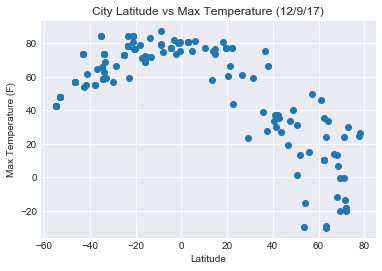

In [114]:
#creates and styles the temperature vs latitude plot

temp_plot = plt.scatter(temps_df['Lats'],temps_df['Temps'])
plt.title('City Latitude vs Max Temperature (12/9/17)')
plt.style.use('seaborn-dark')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Temp.png')
plt.show()


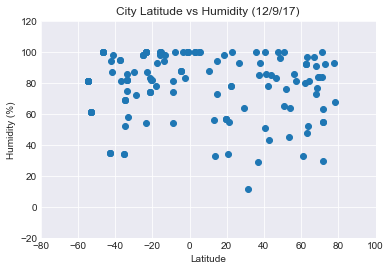

In [115]:
#creates and styles the humidity vs latitude plot

humid_plot = plt.scatter(humid_df['Lats'],humid_df['Humidity'])
plt.title('City Latitude vs Humidity (12/9/17)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Humid.png')
plt.show()

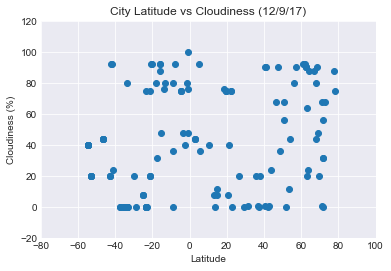

In [117]:
#creates and styles the cloudiness vs latitude plot

cloud_plot = plt.scatter(cloud_df['Lats'],cloud_df['Cloudiness'])
plt.title('City Latitude vs Cloudiness (12/9/17)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Cloud.png')
plt.show()

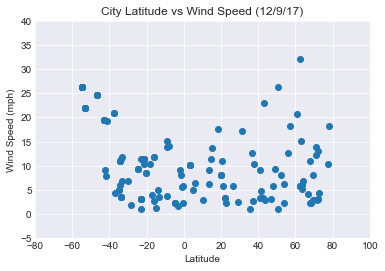

In [118]:
#creates and styles the wind speed vs latitude plot

wind_plot = plt.scatter(wind_df['Lats'],wind_df['Wind_Speed'])
plt.title('City Latitude vs Wind Speed (12/9/17)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Wind.png')
plt.show()